In [2]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data = pd.read_csv("https://raw.githubusercontent.com/VishnuBDev/S7/main/ISEAR.csv")
data=data.dropna(axis=1) #to remove NaN column
data.head()


,Emotion,Text
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


In [3]:
data['Emotion'].value_counts()

joy        1092
sadness    1082
anger      1079
fear       1076
shame      1071
disgust    1066
guilt      1050
Name: Emotion, dtype: int64

In [4]:
x=data['Emotion']
y=data['Text']

table=pd.DataFrame({'emotions':x,'tweets':y})
table



,emotions,tweets
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...
...,...,...
7511,shame,Two years back someone invited me to be the tu...
7512,shame,I had taken the responsibility to do something...
7513,fear,I was at home and I heard a loud sound of spit...
7514,guilt,I did not do the homework that the teacher had...


In [5]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\BDEV\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
table['neg'] = table['tweets'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
table['pos'] = table['tweets'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
table['neu'] = table['tweets'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
table['comp'] = table['tweets'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
table

,emotions,tweets,neg,pos,neu,comp
0,joy,On days when I feel close to my partner and ot...,0.000,0.209,0.791,0.7650
1,fear,Every time I imagine that someone I love or I ...,0.374,0.199,0.427,-0.4019
2,anger,When I had been obviously unjustly treated and...,0.155,0.000,0.845,-0.2960
3,sadness,When I think about the short time that we live...,0.000,0.000,1.000,0.0000
4,disgust,At a gathering I found myself involuntarily si...,0.117,0.000,0.883,-0.3384
...,...,...,...,...,...,...
7511,shame,Two years back someone invited me to be the tu...,0.071,0.000,0.929,-0.7618
7512,shame,I had taken the responsibility to do something...,0.163,0.069,0.768,-0.7269
7513,fear,I was at home and I heard a loud sound of spit...,0.000,0.000,1.000,0.0000
7514,guilt,I did not do the homework that the teacher had...,0.000,0.000,1.000,0.0000


<AxesSubplot:title={'center':'comp'}, xlabel='emotions'>

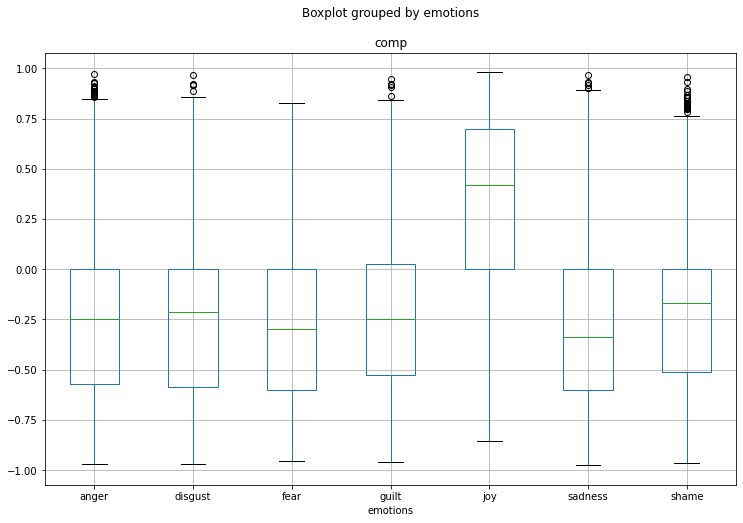

In [7]:
table.boxplot(by='emotions', column='comp', figsize=(12,8))

In [18]:
table=table.sort_values(by="emotions")
print(table)

     emotions                                             tweets    neg  \
3757    anger  The stories about the way my grandmother treat...  0.000   
2515    anger  When I left after the examination to enter the...  0.156   
3926    anger  Out on a weekend with a group of people, every...  0.209   
1435    anger  I share my small flat with my friend. On her b...  0.000   
1243    anger  The last day of school is traditionally celebr...  0.086   
...       ...                                                ...    ...   
3964    shame  A friend came for dinner with me at home. His ...  0.101   
6657    shame  I was the last among the list of failures in m...  0.200   
6053    shame  When I was 12 years old I was caught by the Ti...  0.000   
3929    shame  I cried for 3 hours because I felt very misera...  0.321   
5164    shame  I was about to share lunch with my aunt's husb...  0.000   

        pos    neu    comp  
3757  0.000  1.000  0.0000  
2515  0.000  0.844 -0.5423  
3926  0.047 

In [12]:
anger=table[table['emotions']=='anger']

In [13]:
print(anger)

     emotions                                             tweets    neg  \
3757    anger  The stories about the way my grandmother treat...  0.000   
4530    anger  When I was victimized for running away with a ...  0.241   
1776    anger  I played chess with my 12-year-old brother. I ...  0.287   
4537    anger  When I was accused by my brother of having sto...  0.272   
3509    anger  One day, when I was a child, my grandmother sh...  0.000   
...       ...                                                ...    ...   
3196    anger  That a friend had been badly beaten and stabbe...  0.262   
5853    anger  When I was at S.Y.Bajaj I wanted to get admiss...  0.251   
982     anger  I am a school teacher.  One of the classes doe...  0.256   
5846    anger  A few months ago when I was teaching, I sudden...  0.174   
2582    anger  Someone stole my ski at Vitosha and of course ...  0.147   

        pos    neu    comp  
3757  0.000  1.000  0.0000  
4530  0.000  0.759 -0.8687  
1776  0.317 

In [15]:
print(anger['comp'].mean())

-0.1991176088971269


In [19]:
disgust=table[table['emotions']=='disgust']
print(disgust['comp'].mean())

-0.21750553470919315


In [27]:
print(table[table['emotions']=='fear']['comp'].mean())

-0.2787390334572491


In [28]:
print(table[table['emotions']=='guilt']['comp'].mean())

-0.1898915238095239


In [29]:
print(table[table['emotions']=='joy']['comp'].mean())

0.3567217032967035


In [30]:
print(table[table['emotions']=='sadness']['comp'].mean())

-0.22373456561922392


In [31]:
print(table[table['emotions']=='shame']['comp'].mean())

-0.17084799253034533


In [35]:
print(table[table['emotions']=='joy']['comp'].max())

0.9796
